# Elementary Cellular Automata 

An elementary cellular automaton is a one-dimensional cellular automaton where there are two possible states (labeled 0 and 1) and the rule to determine the state of a cell in the next generation depends only on the current state of the cell and its two immediate neighbors.

There is an elementary cellular automaton (Rule 110 has the perhaps surprising property that it is Turing complete) which is capable of universal computation, and as such it is one of the simplest possible models of computation.

The class below is one implementation of the basics of this simulation. (You are welcome to use mine, but you are also welcome to change it, or indeed make your own).

In [9]:
import numpy as np

class CA():
    
    def __init__(self,size,ruleset):
        self.size = size
        self.state = np.zeros(size)
        self.ruleset = ruleset      

    def rule(self,a,b,c):
        rulenumber = a*(2**2) + b*(2**1) + c*(2**0)
        return(self.ruleset[int(rulenumber)])
    
    def update(self):
        newstate = np.zeros(self.size)
        for i in range(self.size):
            newstate[i] = self.rule(self.state[(i-1)%self.size],self.state[i],self.state[(i+1)%self.size])
        self.state = newstate

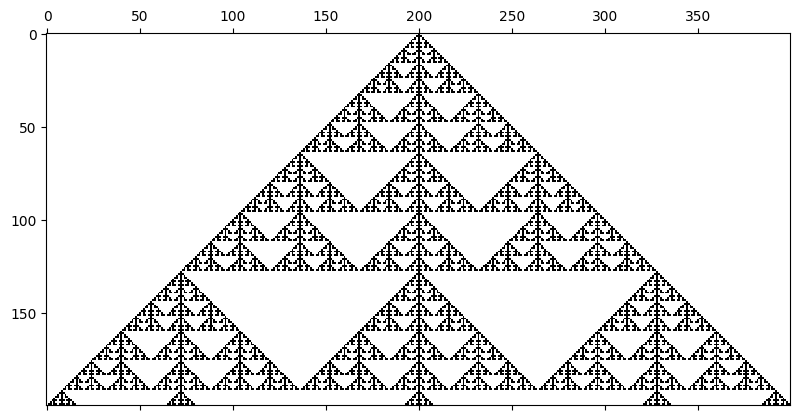

In [14]:
import matplotlib.pyplot as plt

size = 400
a = CA(size, [0,1,1,0,1,0,0,1])
#a = CA(size, [0,1,0,1,1,0,1,0]) #90
#a = CA(size, [0,1,1,1,1,0,0,0]) #30
time = int(size/2)
history = np.zeros((time,size))
a.state = np.random.randint(1,size=size)
a.state[time] = 1

for t in range(time):
    history[t] = a.state
    a.update()

plt.matshow(history,cmap='binary')
plt.show()